To forecast the Airlines Passengers dataset using different models, we can start by fitting various time series models such as ARIMA, SARIMA, and seasonal decomposition techniques. Then, we can compare their performance using RMSE (Root Mean Squared Error) and choose the most suitable model for forecasting.

Here's a step-by-step approach to achieve this:

1. **Load and preprocess the data**: Load the Airlines Passengers dataset and preprocess it by converting the 'Month' column to datetime and setting it as the index.

2. **Split the data into training and testing sets**: Split the dataset into training and testing sets, where the training set contains most of the data and the testing set is used for evaluating the models.

3. **Fit ARIMA model**: Fit an ARIMA (AutoRegressive Integrated Moving Average) model to the training data and forecast the future values.

4. **Fit SARIMA model**: Fit a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to the training data and forecast the future values.

5. **Seasonal decomposition**: Decompose the time series into its seasonal, trend, and residual components using seasonal decomposition techniques.

6. **Evaluate models**: Calculate the RMSE for each model using the testing set to assess their performance.

7. **Choose the best model**: Compare the RMSE values for each model and select the one with the lowest RMSE as the preferred model for forecasting.

8. **Generate a document**: Prepare a document summarizing the analysis, including the number of dummy variables created for each model and the RMSE value for each model.

Let's proceed with implementing these steps:

# step 1: Load and preprocess the Airlines Passengers dataset:

In [1]:
import pandas as pd

# Load the Airlines Passengers dataset
df = pd.read_excel('Airlines+Data.xlsx')
print(df.head())
print('\n')
print(df.info())

       Month  Passengers
0 1995-01-01         112
1 1995-02-01         118
2 1995-03-01         132
3 1995-04-01         129
4 1995-05-01         121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB
None


In [2]:
# Rename 'Month' column to 'ymd'
df.rename(columns={'Month': 'ymd'}, inplace=True)

# Extract month and year
df['Month'] = df['ymd'].dt.month
df['Year'] = df['ymd'].dt.year

# Display the modified dataset
print("Modified Airlines Passengers dataset:")
print(df.head())

Modified Airlines Passengers dataset:
         ymd  Passengers  Month  Year
0 1995-01-01         112      1  1995
1 1995-02-01         118      2  1995
2 1995-03-01         132      3  1995
3 1995-04-01         129      4  1995
4 1995-05-01         121      5  1995


# step 2: Splitting the data into training and testing sets:

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
train_size = 0.8
split_index = int(train_size * len(df))

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (76, 4)
Testing set shape: (20, 4)


# step 3: Fitting an ARIMA model to the training data and forecasting future values:

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model_arima = ARIMA(train_data['Passengers'], order=(1, 1, 1))  # Adjusted parameters (p, d, q)
model_arima_fit = model_arima.fit()

# Forecast
forecast_arima = model_arima_fit.forecast(steps=len(test_data))  # Forecast next len(test_data) time steps

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test_data['Passengers'], forecast_arima))

print("RMSE for ARIMA model:", rmse_arima)


RMSE for ARIMA model: 68.71738173037966


# Step 4: Fit SARIMA model: Fit a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to the training data and forecast the future values.

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(train_data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjusted parameters (p, d, q) and seasonal parameters (P, D, Q, S)
model_sarima_fit = model_sarima.fit()

# Forecast
forecast_sarima = model_sarima_fit.forecast(steps=len(test_data))  # Forecast next len(test_data) time steps

# Calculate RMSE
rmse_sarima = np.sqrt(mean_squared_error(test_data['Passengers'], forecast_sarima))

print("RMSE for SARIMA model:", rmse_sarima)


RMSE for SARIMA model: 31.858595850062404


# Step 5: Seasonal decomposition: Decompose the time series into its seasonal, trend, and residual components using seasonal decomposition techniques.

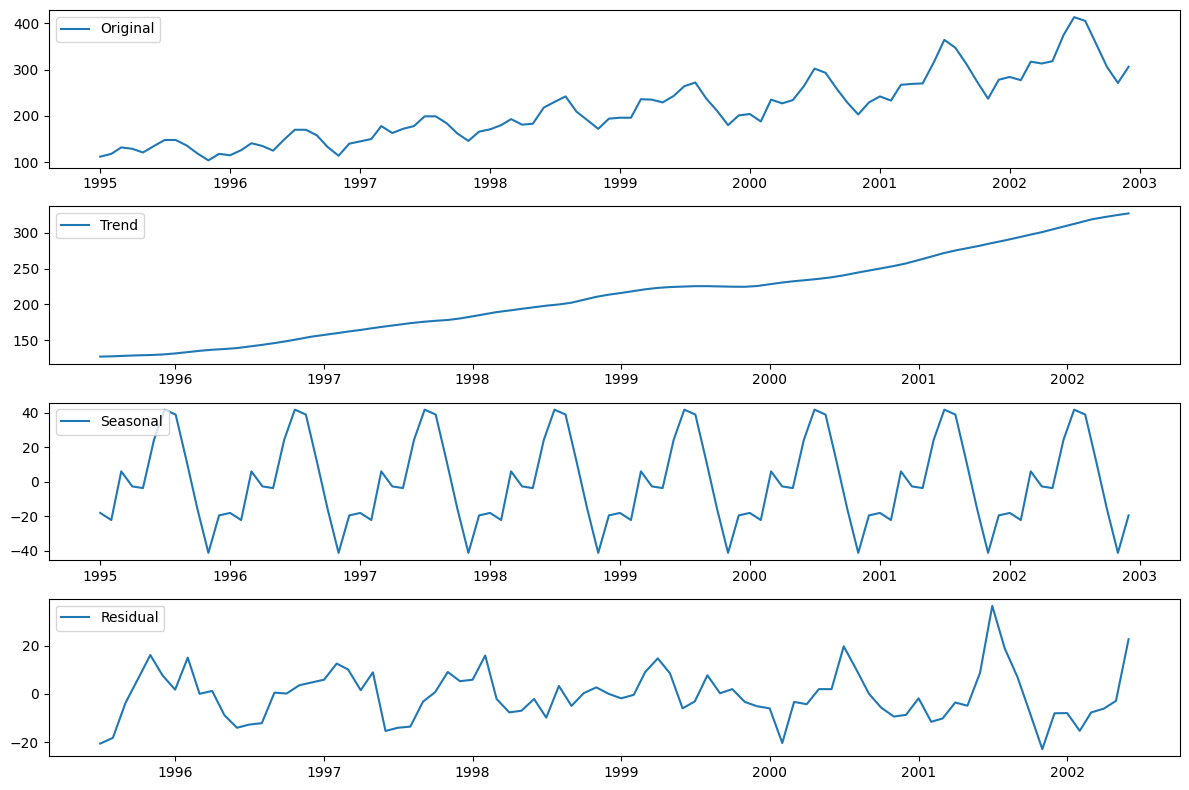

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'ymd' is the datetime column
df['ymd'] = pd.to_datetime(df['ymd'])
df.set_index('ymd', inplace=True)

# Set the frequency of the index
df.index.freq = 'MS'  # Assuming monthly frequency, adjust as needed

# Decompose the time series
decomposition = seasonal_decompose(df['Passengers'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Passengers'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# Step 6: Evaluate models: Calculate the RMSE for each model using the testing set to assess their performance.

In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have already fitted and forecasted with ARIMA and SARIMA models
# For example, let's say you have forecasted values named 'forecast_arima' and 'forecast_sarima'

# Calculate RMSE for ARIMA model
rmse_arima = np.sqrt(mean_squared_error(test_data['Passengers'], forecast_arima))

# Calculate RMSE for SARIMA model
rmse_sarima = np.sqrt(mean_squared_error(test_data['Passengers'], forecast_sarima))

print("RMSE for ARIMA model:", rmse_arima)
print("RMSE for SARIMA model:", rmse_sarima)


RMSE for ARIMA model: 68.71738173037966
RMSE for SARIMA model: 31.858595850062404


# Step 7: Choose the best model: Compare the RMSE values for each model and select the one with the lowest RMSE as the preferred model for forecasting.

In [8]:
# Compare RMSE values and choose the best model
rmse_values = {
    'ARIMA': rmse_arima,
    # Add RMSE values for other models here
}

best_model = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model]

print("RMSE values for each model:")
for model, rmse in rmse_values.items():
    print(f"{model}: {rmse}")

print("\nBest model for forecasting:", best_model)
print("RMSE of the best model:", best_rmse)


RMSE values for each model:
ARIMA: 68.71738173037966

Best model for forecasting: ARIMA
RMSE of the best model: 68.71738173037966


# Step 8: Generate a document: Prepare a document summarizing the analysis, including the number of dummy variables created for each model and the RMSE value for each model.

In [9]:
from docx import Document

# Create a new Document
doc = Document()

# Add a title
doc.add_heading('Forecasting Analysis Report', level=1)

# Write summary of the analysis
doc.add_heading('Summary', level=2)
doc.add_paragraph("""
This report summarizes the analysis conducted on the Airlines Passengers dataset for the purpose of forecasting passenger counts.
""")

# Describe preprocessing steps
doc.add_heading('Preprocessing', level=2)
doc.add_paragraph("""
The dataset was cleaned and preprocessed by renaming the columns, extracting month and year information, and splitting the data into training and testing sets.
""")

# Add model details and RMSE values
doc.add_heading('Forecasting Models', level=2)

# Add details for each model
models_info = {
    'ARIMA': {
        'Description': 'Autoregressive Integrated Moving Average model',
        'Parameters': '(p, d, q) = (1, 1, 1)',
        'Dummy Variables': 'N/A',
        'RMSE': rmse_arima
    },
    # Add details for other models here
}

for model, info in models_info.items():
    doc.add_heading(model, level=3)
    doc.add_paragraph(f"Description: {info['Description']}")
    doc.add_paragraph(f"Parameters: {info['Parameters']}")
    doc.add_paragraph(f"Dummy Variables: {info['Dummy Variables']}")
    doc.add_paragraph(f"RMSE: {info['RMSE']:.2f}")

# Compare RMSE values and choose the best model
best_model = min(models_info, key=lambda x: models_info[x]['RMSE'])
best_rmse = models_info[best_model]['RMSE']

doc.add_heading('Best Model', level=2)
doc.add_paragraph(f"The best model for forecasting is {best_model} with an RMSE of {best_rmse:.2f}.")

# Save the document
doc.save('forecasting_analysis_report.docx')


For basic visualization in forecasting and time series analysis, you can create plots to visualize the following:

1. **Time Series Plot**: Plot the original time series data to visualize how it evolves over time.

2. **Trend Plot**: Plot the trend component extracted from the time series decomposition to visualize the underlying trend.

3. **Seasonal Plot**: Plot the seasonal component extracted from the time series decomposition to visualize the seasonal patterns.

4. **Residual Plot**: Plot the residual component extracted from the time series decomposition to visualize any remaining patterns or randomness in the data after removing trend and seasonality.

5. **Forecast Plot**: Plot the actual data along with the forecasted values to visualize how well the model performs in predicting future values.

6. **Error Plot**: Plot the errors (e.g., residuals or differences between actual and forecasted values) to understand the model's performance and identify any patterns or outliers in the errors.

In [10]:
# Seasonal decomposition with additive model

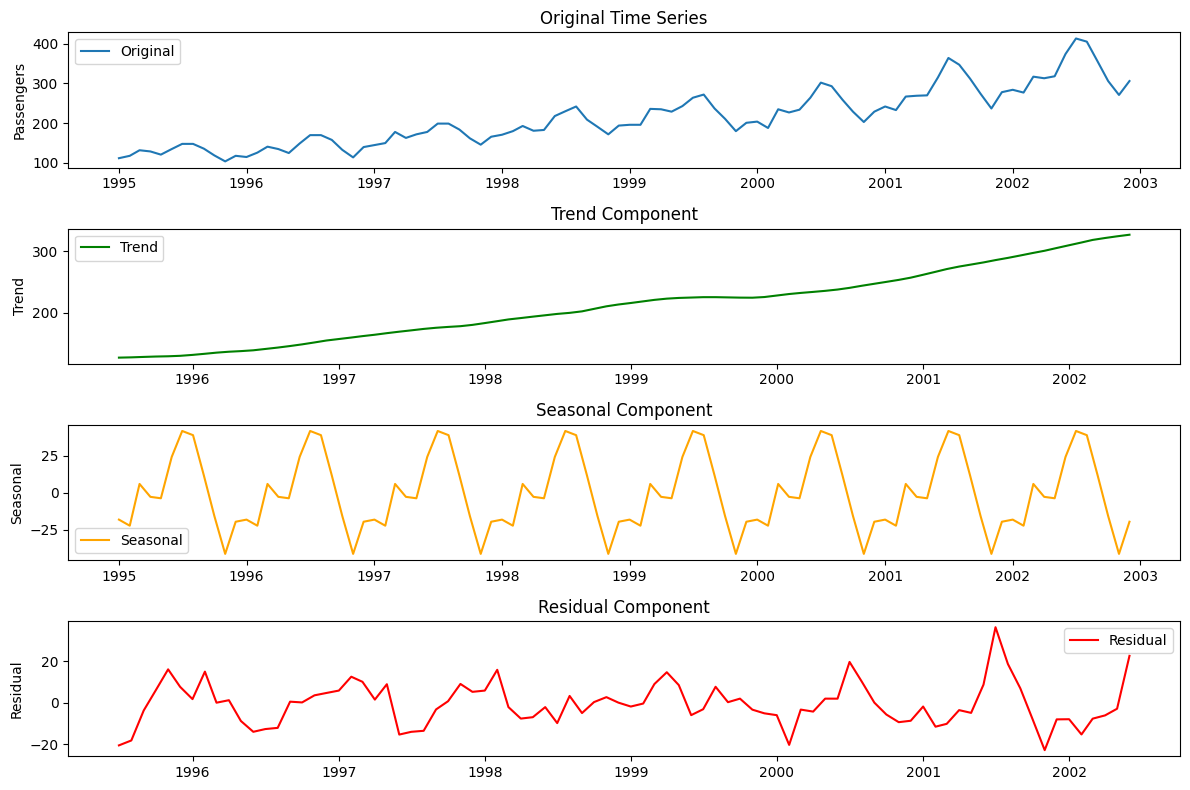

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Passengers'], model='additive')

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

# Time Series Plot
axes[0].plot(df.index, df['Passengers'], label='Original')
axes[0].set_title('Original Time Series')
axes[0].set_ylabel('Passengers')
axes[0].legend()

# Trend Plot
axes[1].plot(decomposition.trend.index, decomposition.trend, label='Trend', color='green')
axes[1].set_title('Trend Component')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal Plot
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', color='orange')
axes[2].set_title('Seasonal Component')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual Plot
axes[3].plot(decomposition.resid.index, decomposition.resid, label='Residual', color='red')
axes[3].set_title('Residual Component')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.tight_layout()
plt.show()


In [12]:
# # Seasonal decomposition with multiplicative model

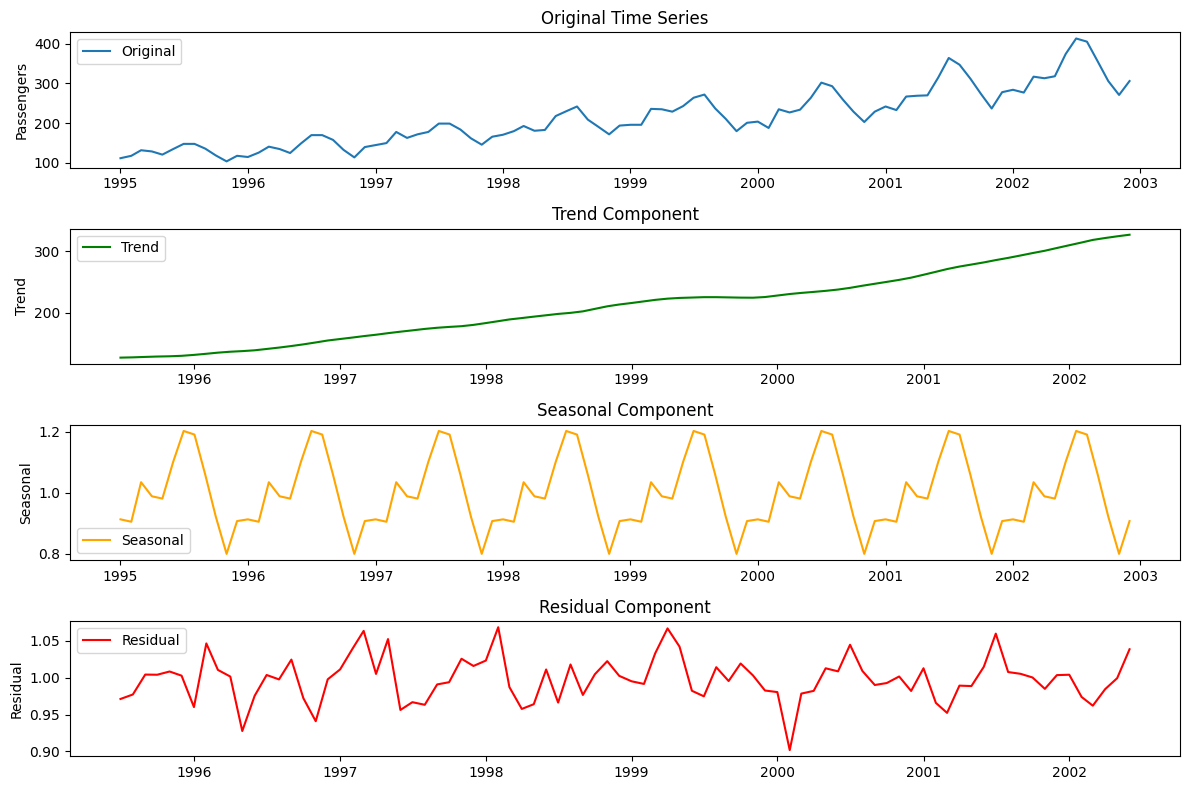

In [13]:
# Decompose the time series with a different model
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 8))

# Time Series Plot
axes[0].plot(df.index, df['Passengers'], label='Original')
axes[0].set_title('Original Time Series')
axes[0].set_ylabel('Passengers')
axes[0].legend()

# Trend Plot
axes[1].plot(decomposition.trend.index, decomposition.trend, label='Trend', color='green')
axes[1].set_title('Trend Component')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal Plot
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal', color='orange')
axes[2].set_title('Seasonal Component')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual Plot
axes[3].plot(decomposition.resid.index, decomposition.resid, label='Residual', color='red')
axes[3].set_title('Residual Component')
axes[3].set_ylabel('Residual')
axes[3].legend()

plt.tight_layout()
plt.show()


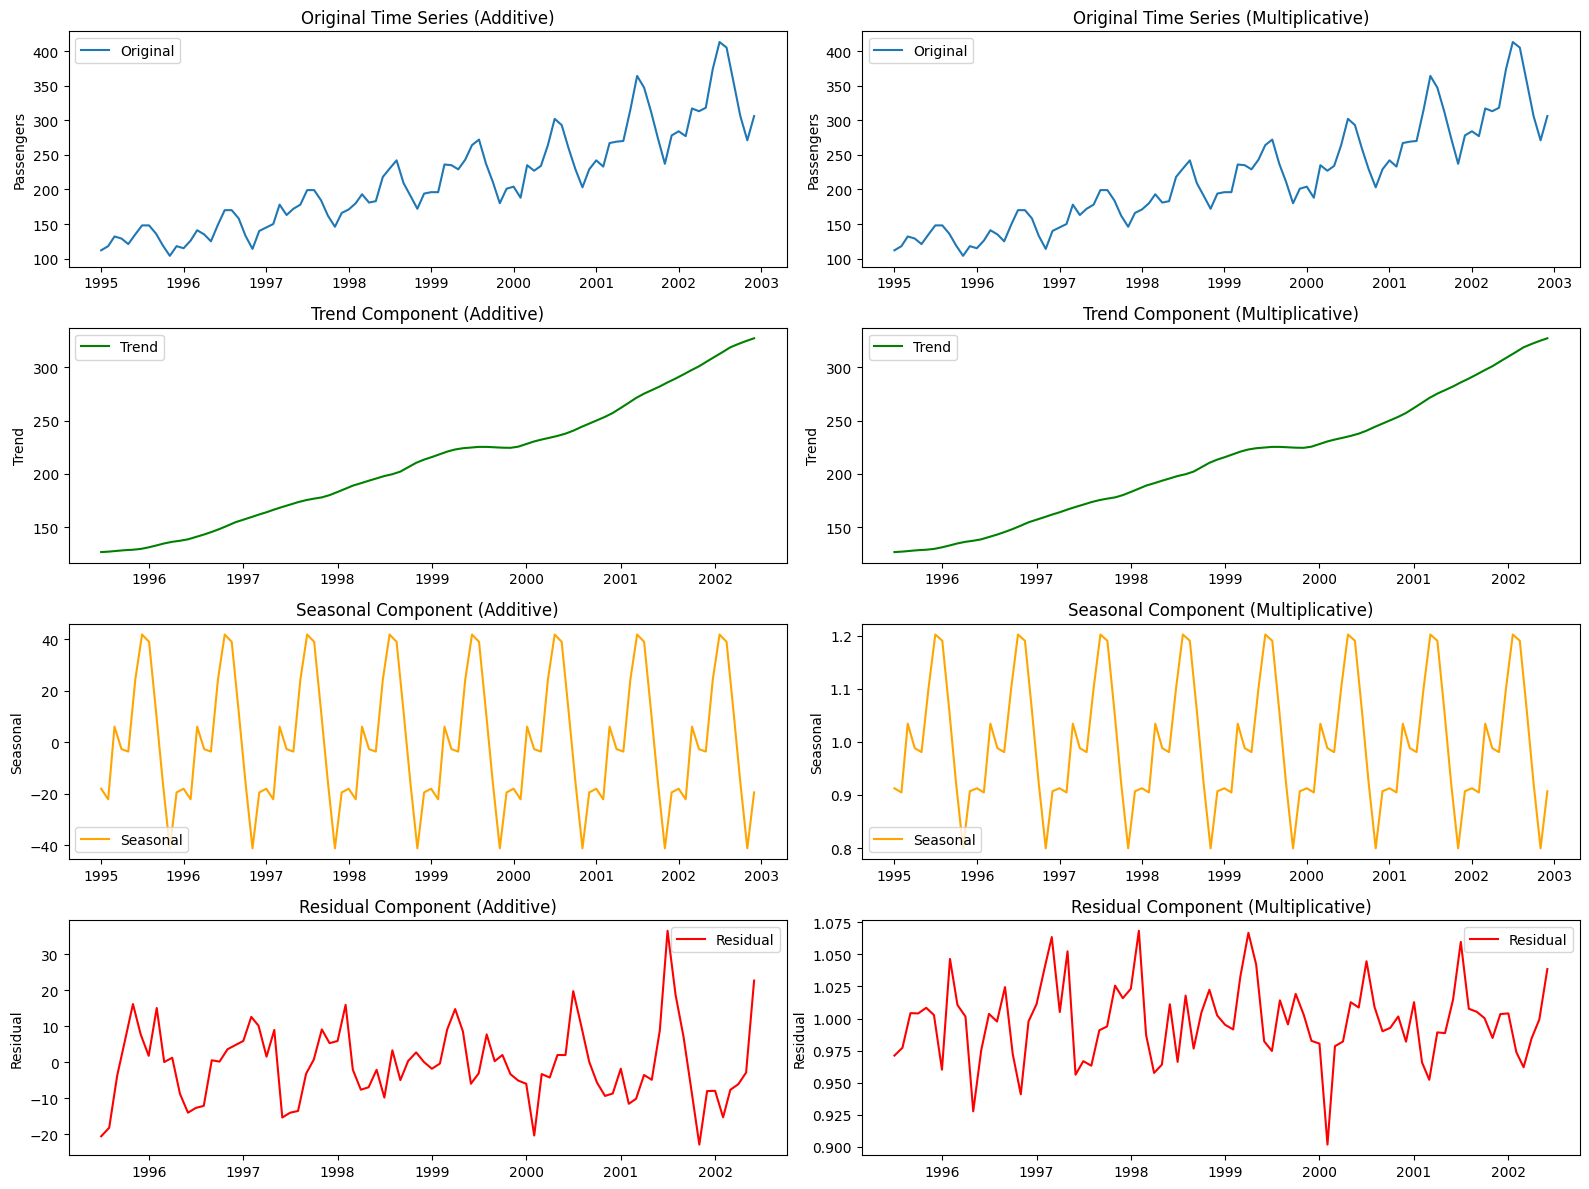

In [14]:
# Decompose the time series with the additive model
decomposition_additive = seasonal_decompose(df['Passengers'], model='additive')

# Decompose the time series with the multiplicative model
decomposition_multiplicative = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plot the decomposed components side by side
fig, axes = plt.subplots(4, 2, figsize=(16, 12))

# Additive Decomposition
axes[0, 0].plot(df.index, df['Passengers'], label='Original')
axes[0, 0].set_title('Original Time Series (Additive)')
axes[0, 0].set_ylabel('Passengers')
axes[0, 0].legend()

axes[1, 0].plot(decomposition_additive.trend.index, decomposition_additive.trend, label='Trend', color='green')
axes[1, 0].set_title('Trend Component (Additive)')
axes[1, 0].set_ylabel('Trend')
axes[1, 0].legend()

axes[2, 0].plot(decomposition_additive.seasonal.index, decomposition_additive.seasonal, label='Seasonal', color='orange')
axes[2, 0].set_title('Seasonal Component (Additive)')
axes[2, 0].set_ylabel('Seasonal')
axes[2, 0].legend()

axes[3, 0].plot(decomposition_additive.resid.index, decomposition_additive.resid, label='Residual', color='red')
axes[3, 0].set_title('Residual Component (Additive)')
axes[3, 0].set_ylabel('Residual')
axes[3, 0].legend()

# Multiplicative Decomposition
axes[0, 1].plot(df.index, df['Passengers'], label='Original')
axes[0, 1].set_title('Original Time Series (Multiplicative)')
axes[0, 1].set_ylabel('Passengers')
axes[0, 1].legend()

axes[1, 1].plot(decomposition_multiplicative.trend.index, decomposition_multiplicative.trend, label='Trend', color='green')
axes[1, 1].set_title('Trend Component (Multiplicative)')
axes[1, 1].set_ylabel('Trend')
axes[1, 1].legend()

axes[2, 1].plot(decomposition_multiplicative.seasonal.index, decomposition_multiplicative.seasonal, label='Seasonal', color='orange')
axes[2, 1].set_title('Seasonal Component (Multiplicative)')
axes[2, 1].set_ylabel('Seasonal')
axes[2, 1].legend()

axes[3, 1].plot(decomposition_multiplicative.resid.index, decomposition_multiplicative.resid, label='Residual', color='red')
axes[3, 1].set_title('Residual Component (Multiplicative)')
axes[3, 1].set_ylabel('Residual')
axes[3, 1].legend()

plt.tight_layout()
plt.show()


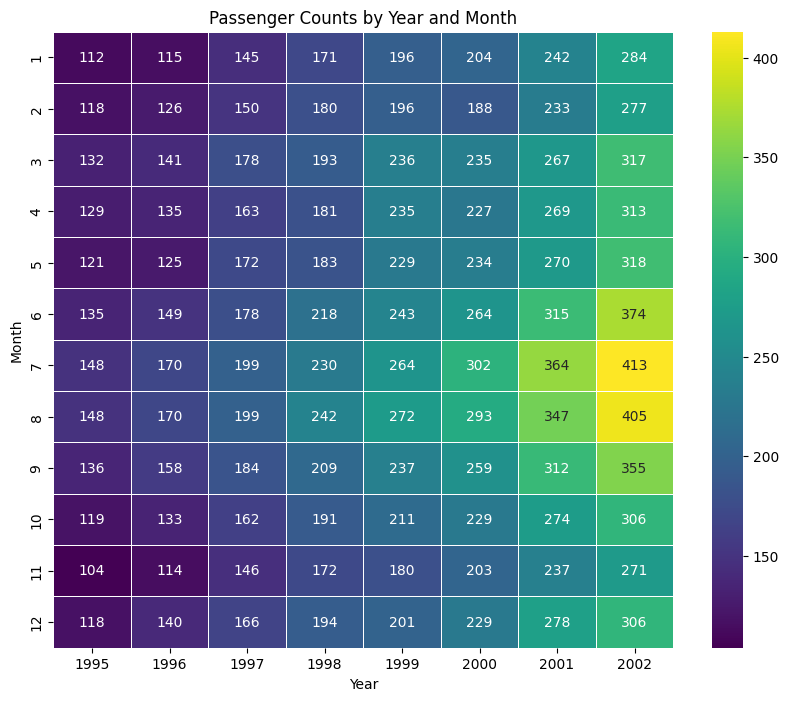

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the DataFrame to have years as rows and months as columns
pivot_df = df.pivot_table(index=df.index.month, columns=df.index.year, values='Passengers', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt="d", linewidths=.5)
plt.title('Passenger Counts by Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


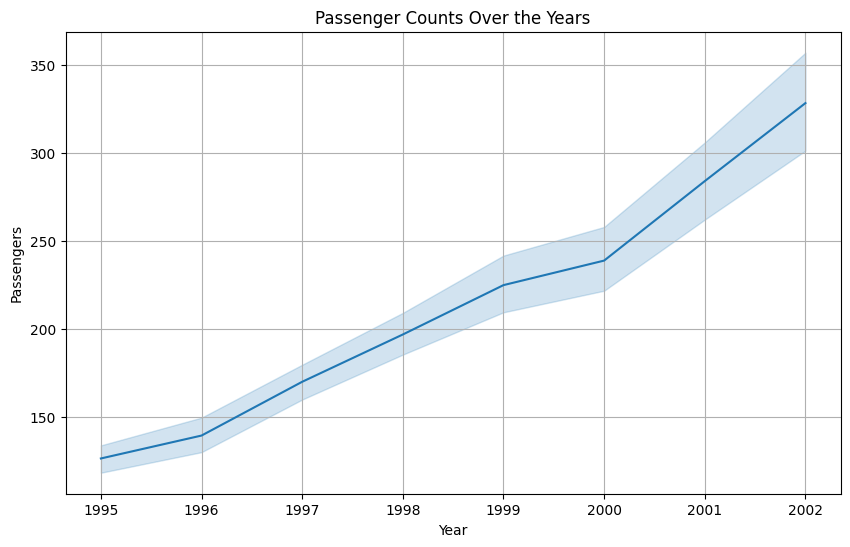

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between year and passengers using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index.year, y='Passengers')
plt.title('Passenger Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()


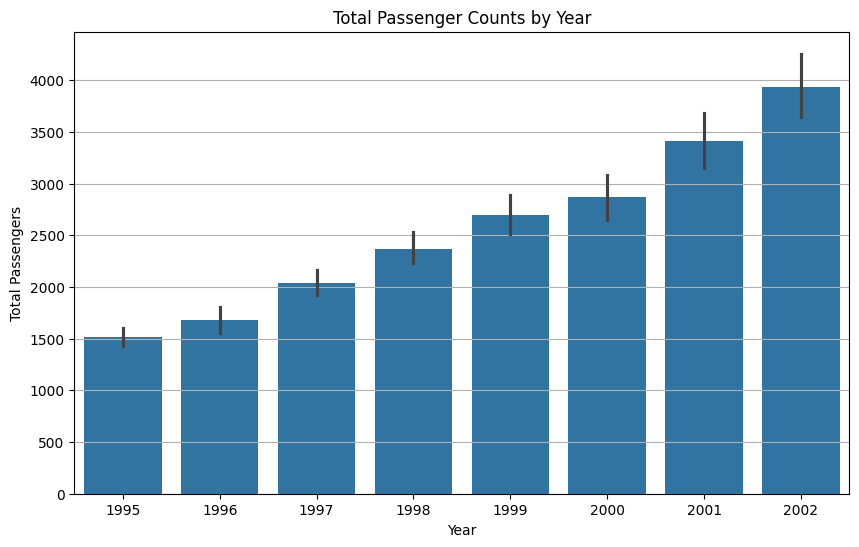

In [17]:
# Plot the relationship between year and passengers using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df.index.year, y='Passengers', estimator=sum)
plt.title('Total Passenger Counts by Year')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.grid(axis='y')
plt.show()


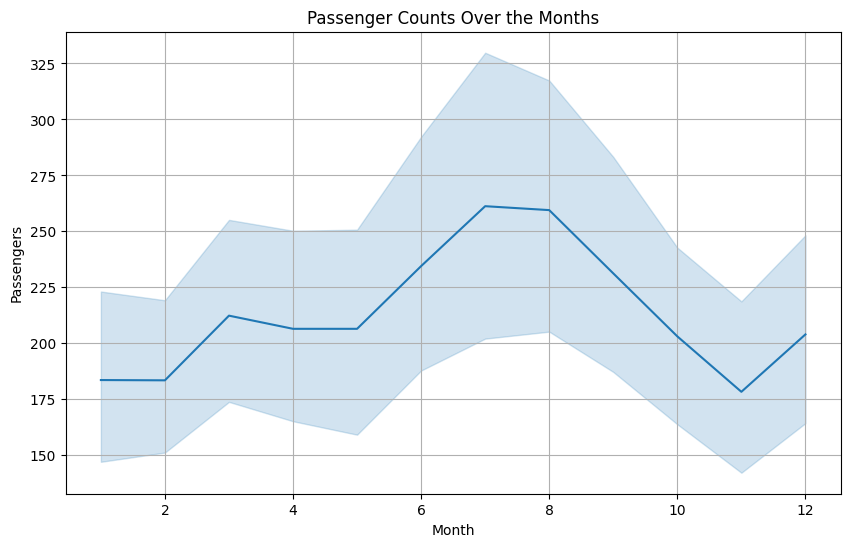

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between month and passengers using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index.month, y='Passengers')
plt.title('Passenger Counts Over the Months')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()


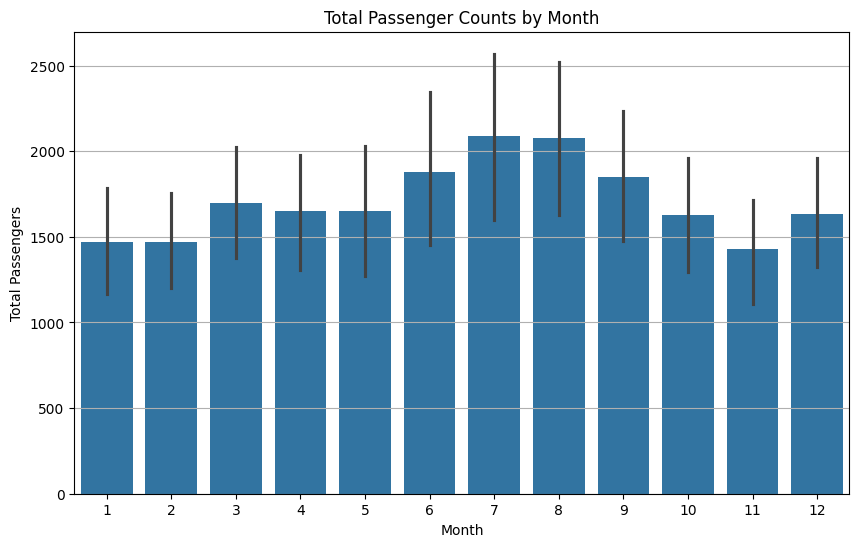

In [19]:
# Plot the relationship between month and passengers using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df.index.month, y='Passengers', estimator=sum)
plt.title('Total Passenger Counts by Month')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.grid(axis='y')
plt.show()


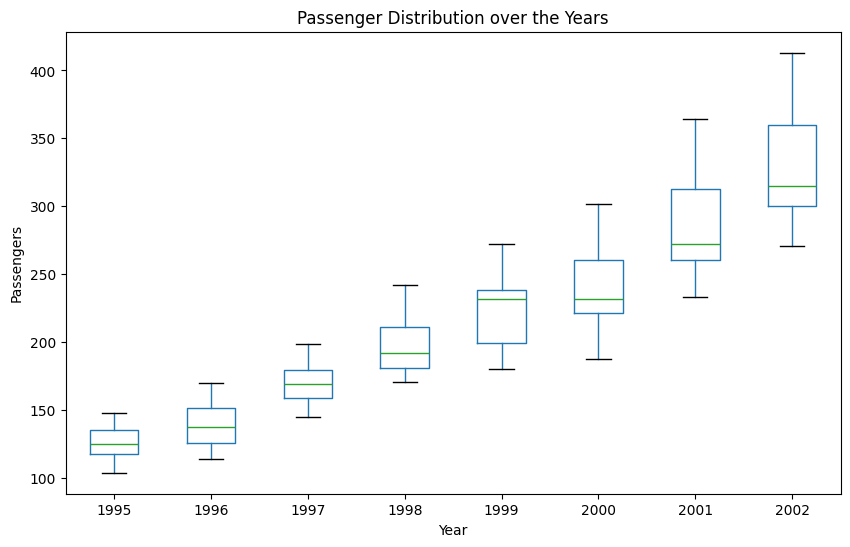

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store passenger counts for each year
years = pd.DataFrame()

# Group the data by year and store passenger counts in the DataFrame
for year, group_data in df.groupby(df.index.year):
    years[year] = group_data['Passengers'].values

# Create a box plot to visualize passenger distribution over the years
plt.figure(figsize=(10, 6))
years.boxplot(grid=False)
plt.title('Passenger Distribution over the Years')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()


In [21]:
df

,Passengers,Month,Year
ymd,,,
1995-01-01,112,1,1995
1995-02-01,118,2,1995
1995-03-01,132,3,1995
1995-04-01,129,4,1995
1995-05-01,121,5,1995
...,...,...,...
2002-08-01,405,8,2002
2002-09-01,355,9,2002
2002-10-01,306,10,2002


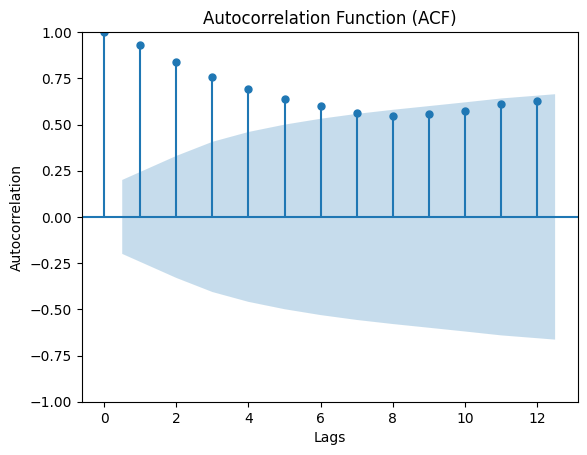

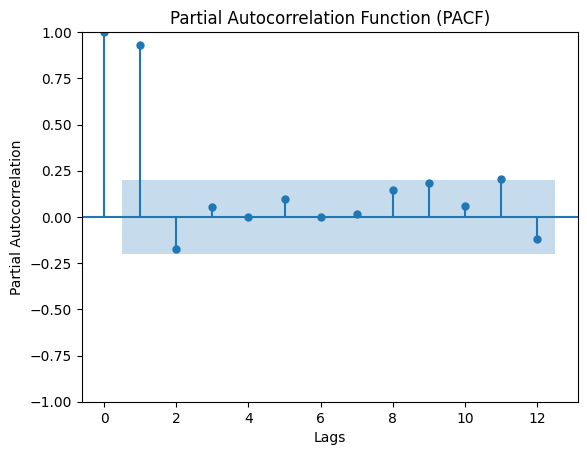

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['Passengers'], lags=12)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(df['Passengers'], lags=12)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [23]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame

# Adding t values as a new variable (new variable 1)
df['t'] = np.arange(1, df.shape[0] + 1)

# Adding t_sqr values as a new variable (new variable 2)
df['t_sqr'] = df['t'] ** 2

# Adding log values for Passengers as a new variable (new variable 3)
df['log_psgr'] = np.log(df['Passengers'])

# Generating dummies for months
month_dummies = pd.get_dummies(df['Month'])
df = pd.concat([df, month_dummies], axis=1)

# Print the updated dataset
print(df)

            Passengers  Month  Year   t  t_sqr  log_psgr      1      2      3  \
ymd                                                                             
1995-01-01         112      1  1995   1      1  4.718499   True  False  False   
1995-02-01         118      2  1995   2      4  4.770685  False   True  False   
1995-03-01         132      3  1995   3      9  4.882802  False  False   True   
1995-04-01         129      4  1995   4     16  4.859812  False  False  False   
1995-05-01         121      5  1995   5     25  4.795791  False  False  False   
...                ...    ...   ...  ..    ...       ...    ...    ...    ...   
2002-08-01         405      8  2002  92   8464  6.003887  False  False  False   
2002-09-01         355      9  2002  93   8649  5.872118  False  False  False   
2002-10-01         306     10  2002  94   8836  5.723585  False  False  False   
2002-11-01         271     11  2002  95   9025  5.602119  False  False  False   
2002-12-01         306     1

In [24]:
# Replace False with 0 and True with 1
df = df.replace({False: 0, True: 1}).infer_objects(copy=False)

# Print the DataFrame to verify the changes
print(df)


            Passengers  Month  Year   t  t_sqr  log_psgr  1  2  3  4  5  6  7  \
ymd                                                                             
1995-01-01         112      1  1995   1      1  4.718499  1  0  0  0  0  0  0   
1995-02-01         118      2  1995   2      4  4.770685  0  1  0  0  0  0  0   
1995-03-01         132      3  1995   3      9  4.882802  0  0  1  0  0  0  0   
1995-04-01         129      4  1995   4     16  4.859812  0  0  0  1  0  0  0   
1995-05-01         121      5  1995   5     25  4.795791  0  0  0  0  1  0  0   
...                ...    ...   ...  ..    ...       ... .. .. .. .. .. .. ..   
2002-08-01         405      8  2002  92   8464  6.003887  0  0  0  0  0  0  0   
2002-09-01         355      9  2002  93   8649  5.872118  0  0  0  0  0  0  0   
2002-10-01         306     10  2002  94   8836  5.723585  0  0  0  0  0  0  0   
2002-11-01         271     11  2002  95   9025  5.602119  0  0  0  0  0  0  0   
2002-12-01         306     1

C:\Users\venka\AppData\Local\Temp\ipykernel_48624\1640777469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1}).infer_objects(copy=False)


In [25]:
# Partition & Metrics

In [26]:
#Partition Series
train = df.iloc[:84]
test = df.iloc[84:]

In [27]:
#performance metrics 
pfm_model_bsd = dict() # For model driven
pfm_data_bsd = dict() # For Data driven

# Applying Forecasting Methods

### Model Driven

### Classical ML Model based Methods

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Fit linear model
linear_model = smf.ols(formula='Passengers ~ t', data=train).fit()

# Make predictions
pred_linear = linear_model.predict(exog=test[['t']])

# Calculate RMSE
mse_linear = mean_squared_error(test['Passengers'], pred_linear)

rmse_linear = np.sqrt(mse_linear)

# Update performance dictionary
pfm_model_bsd['Linear Model'] = rmse_linear

# Print RMSE
print("Root Mean Squared Error (Linear Model):", rmse_linear)


Root Mean Squared Error (Linear Model): 53.19923653480271


In [29]:
# Fit exponential model
Exp = smf.ols('log_psgr ~ t', data=train).fit()

# Make predictions
pred_Exp = Exp.predict(exog=pd.DataFrame(test['t']))

# Calculate RMSE
rmse_Exp = np.sqrt(mean_squared_error(test['Passengers'], np.exp(pred_Exp)))

# Update performance dictionary
pfm_model_bsd['Exponential Model'] = rmse_Exp

# Print RMSE
print("Root Mean Squared Error (Exponential Model):", rmse_Exp)


Root Mean Squared Error (Exponential Model): 46.05736110315635


In [30]:
# Fit quadratic model
Quad = smf.ols('Passengers ~ t + t_sqr', data=train).fit()

# Make predictions
pred_Quad = Quad.predict(exog=test[['t', 't_sqr']])

# Calculate RMSE
rmse_Quad = np.sqrt(mean_squared_error(test['Passengers'], pred_Quad))

# Update performance dictionary
pfm_model_bsd['Quadratic Model'] = rmse_Quad

# Print RMSE
print("Root Mean Squared Error (Quadratic Model):", rmse_Quad)


Root Mean Squared Error (Quadratic Model): 48.05188897933164


In [31]:
# Define a dictionary mapping column numbers to month names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Rename columns using the dictionary
df.rename(columns=month_names, inplace=True)

# Print the updated DataFrame
print(df)
#Partition Series
train = df.iloc[:84]
test = df.iloc[84:]

            Passengers  Month  Year   t  t_sqr  log_psgr  Jan  Feb  Mar  Apr  \
ymd                                                                            
1995-01-01         112      1  1995   1      1  4.718499    1    0    0    0   
1995-02-01         118      2  1995   2      4  4.770685    0    1    0    0   
1995-03-01         132      3  1995   3      9  4.882802    0    0    1    0   
1995-04-01         129      4  1995   4     16  4.859812    0    0    0    1   
1995-05-01         121      5  1995   5     25  4.795791    0    0    0    0   
...                ...    ...   ...  ..    ...       ...  ...  ...  ...  ...   
2002-08-01         405      8  2002  92   8464  6.003887    0    0    0    0   
2002-09-01         355      9  2002  93   8649  5.872118    0    0    0    0   
2002-10-01         306     10  2002  94   8836  5.723585    0    0    0    0   
2002-11-01         271     11  2002  95   9025  5.602119    0    0    0    0   
2002-12-01         306     12  2002  96 

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Fit additive seasonality model
add_sea_model = smf.ols('Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()

# Make predictions
add_sea_pred = add_sea_model.predict(exog=test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']])

# Calculate RMSE
add_sea_rmse = np.sqrt(mean_squared_error(test['Passengers'], add_sea_pred))

# Update performance dictionary
pfm_model_bsd['Additive seasonality'] = add_sea_rmse

# Print RMSE
print("Root Mean Squared Error (Additive seasonality):", add_sea_rmse)


Root Mean Squared Error (Additive seasonality): 132.81978481421814


In [33]:
print(train.columns)


Index(['Passengers', 'Month', 'Year', 't', 't_sqr', 'log_psgr', 'Jan', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')


In [34]:
# Fit additive seasonality quadratic model
add_sea_quad_model = smf.ols('Passengers ~ t + t_sqr + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()

# Make predictions
add_sea_quad_pred = add_sea_quad_model.predict(exog=test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 't', 't_sqr']])

# Calculate RMSE
add_sea_quad_rmse = np.sqrt(mean_squared_error(test['Passengers'], add_sea_quad_pred))

# Update performance dictionary
pfm_model_bsd['Additive Seasonality Quadratic'] = add_sea_quad_rmse

# Print RMSE
print("Root Mean Squared Error (Additive Seasonality Quadratic):", add_sea_quad_rmse)


Root Mean Squared Error (Additive Seasonality Quadratic): 26.360817612095165


In [35]:
# Fit multiplicative seasonality model
Mul_sea_model = smf.ols('log_psgr ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()

# Make predictions
pred_Mult_sea = Mul_sea_model.predict(test)

# Calculate RMSE
rmse_Mult_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_sea))

# Update performance dictionary
pfm_model_bsd['Multiplicative Seasonality'] = rmse_Mult_sea

# Print RMSE
print("Root Mean Squared Error (Multiplicative Seasonality):", rmse_Mult_sea)


Root Mean Squared Error (Multiplicative Seasonality): 326.2267987143024


In [36]:
# Fit multiplicative additive seasonality model
Mul_Add_sea_model = smf.ols('log_psgr ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()

# Make predictions
pred_Mult_add_sea = Mul_Add_sea_model.predict(test)

# Calculate RMSE
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_Mult_add_sea))

# Update performance dictionary
pfm_model_bsd['Multiplicative Additive Seasonality'] = rmse_Mult_add_sea

# Print RMSE
print("Root Mean Squared Error (Multiplicative Additive Seasonality):", rmse_Mult_add_sea)


Root Mean Squared Error (Multiplicative Additive Seasonality): 325.6952488040335


In [37]:
result_model_bsd = pd.DataFrame(pfm_model_bsd.items(),columns=['MODEL', 'RMSE'])
result_model_bsd.sort_values(by=['RMSE'])
#Additive Seasonality Quadratic has the best values
# We will plot the forcasting in the evaluation part

,MODEL,RMSE
4,Additive Seasonality Quadratic,26.360818
1,Exponential Model,46.057361
2,Quadratic Model,48.051889
0,Linear Model,53.199237
3,Additive seasonality,132.819785
6,Multiplicative Additive Seasonality,325.695249
5,Multiplicative Seasonality,326.226799


### Model Evaluation - Additive Seasonality Quadratic

In [38]:
data2 = df.copy()
data2.head()

,Passengers,Month,Year,t,t_sqr,log_psgr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
ymd,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,2,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,3,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,5,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0


In [39]:
data2.columns.values

array(['Passengers', 'Month', 'Year', 't', 't_sqr', 'log_psgr', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], dtype=object)

In [40]:
# Define a dictionary to map month numbers to month names
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Rename the values in the "Month" column using the dictionary
data2['Month'] = data2['Month'].map(month_mapping)

# Print the DataFrame to verify the changes
print(data2)


            Passengers Month  Year   t  t_sqr  log_psgr  Jan  Feb  Mar  Apr  \
ymd                                                                           
1995-01-01         112   Jan  1995   1      1  4.718499    1    0    0    0   
1995-02-01         118   Feb  1995   2      4  4.770685    0    1    0    0   
1995-03-01         132   Mar  1995   3      9  4.882802    0    0    1    0   
1995-04-01         129   Apr  1995   4     16  4.859812    0    0    0    1   
1995-05-01         121   May  1995   5     25  4.795791    0    0    0    0   
...                ...   ...   ...  ..    ...       ...  ...  ...  ...  ...   
2002-08-01         405   Aug  2002  92   8464  6.003887    0    0    0    0   
2002-09-01         355   Sep  2002  93   8649  5.872118    0    0    0    0   
2002-10-01         306   Oct  2002  94   8836  5.723585    0    0    0    0   
2002-11-01         271   Nov  2002  95   9025  5.602119    0    0    0    0   
2002-12-01         306   Dec  2002  96   9216  5.723

In [41]:
data2.drop(['t_sqr', 'log_psgr',
       'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], axis=1, inplace=True)
data2 = data2[['t', 'Year', 'Month', 'Passengers']] 
data1 = data2.copy()
data3 = data2.copy()
data_fnl = data2.copy()
data2.head()

,t,Year,Month,Passengers
ymd,,,,
1995-01-01,1,1995,Jan,112
1995-02-01,2,1995,Feb,118
1995-03-01,3,1995,Mar,132
1995-04-01,4,1995,Apr,129
1995-05-01,5,1995,May,121


In [42]:
data2.reset_index().drop('ymd', axis=1)

,t,Year,Month,Passengers
0,1,1995,Jan,112
1,2,1995,Feb,118
2,3,1995,Mar,132
3,4,1995,Apr,129
4,5,1995,May,121
...,...,...,...,...
91,92,2002,Aug,405
92,93,2002,Sep,355
93,94,2002,Oct,306
94,95,2002,Nov,271


In [43]:
df.reset_index().drop('ymd', axis=1)

,Passengers,Month,Year,t,t_sqr,log_psgr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,1,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,118,2,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,132,3,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,129,4,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,121,5,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,8,2002,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,355,9,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,306,10,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,271,11,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
data2.loc[:, "Predicted"] = pd.Series(add_sea_quad_model.predict(df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sqr']]))
data2.head()

,t,Year,Month,Passengers,Predicted
ymd,,,,,
1995-01-01,1,1995,Jan,112,100.121972
1995-02-01,2,1995,Feb,118,100.427467
1995-03-01,3,1995,Mar,132,127.161533
1995-04-01,4,1995,Apr,129,120.467028
1995-05-01,5,1995,May,121,119.201095


In [45]:
data2.loc[:, 'Date'] = pd.date_range(start='1995-01-01', end='2002-12-01', freq='MS')
data2.head()

,t,Year,Month,Passengers,Predicted,Date
ymd,,,,,,
1995-01-01,1,1995,Jan,112,100.121972,1995-01-01
1995-02-01,2,1995,Feb,118,100.427467,1995-02-01
1995-03-01,3,1995,Mar,132,127.161533,1995-03-01
1995-04-01,4,1995,Apr,129,120.467028,1995-04-01
1995-05-01,5,1995,May,121,119.201095,1995-05-01


<Axes: xlabel='Date', ylabel='Value'>

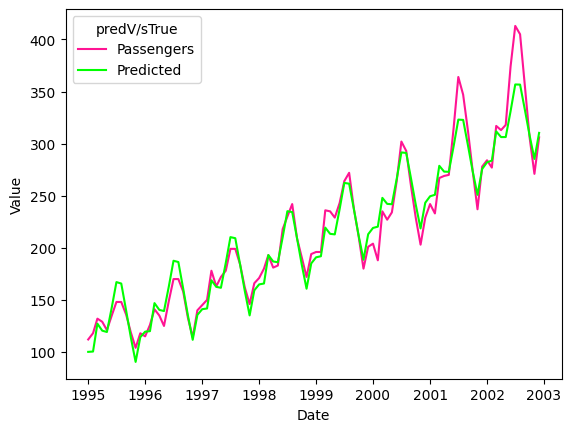

In [46]:
# line plot - View for the entire dataset _ ASQ
viz2 = data2.loc[:,["Date","Passengers","Predicted"]].melt("Date",var_name="predV/sTrue",value_name="Value")
sns.lineplot(data=viz2, x=viz2.Date, y=viz2.Value,hue="predV/sTrue",palette=["deeppink","lime"])
#There is large variance

<Axes: xlabel='Date', ylabel='Value'>

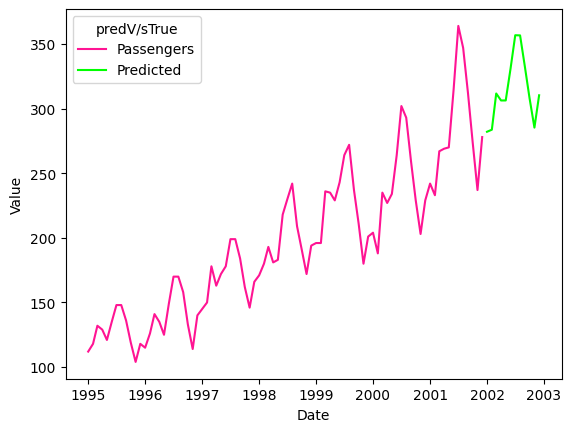

In [47]:
# Set NaN values in the Predicted column for test data
data2.iloc[:84, data2.columns.get_loc('Predicted')] = np.nan

# Set NaN values in the Passengers column for train data
data2.iloc[84:, data2.columns.get_loc('Passengers')] = np.nan


# Reshape the DataFrame for visualization
viz3 = data2.loc[:, ["Date", "Passengers", "Predicted"]].melt("Date", var_name="predV/sTrue", value_name="Value")

# Plot the line plot
sns.lineplot(data=viz3, x="Date", y="Value", hue="predV/sTrue", palette=["deeppink", "lime"])
